In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load classification dataset
tiktok_df = pd.read_csv("../data/tiktok_dataset.csv")
print(tiktok_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB
None


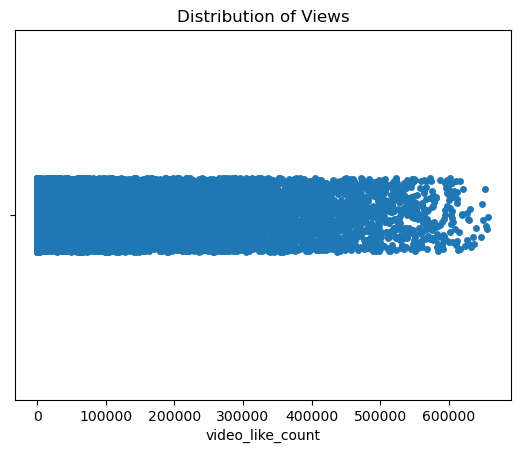

In [24]:
#visualize target distribution
sns.stripplot(x='video_like_count', data=tiktok_df)
plt.title("Distribution of Views")
plt.show()

In [4]:
# Load regression dataset
sales_df = pd.read_csv("../data/vgsales.csv")
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


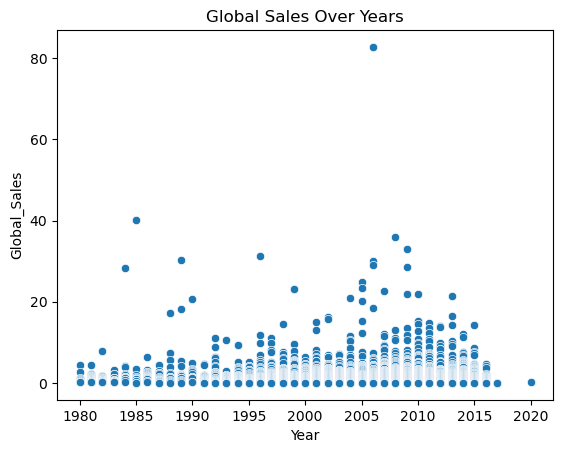

In [5]:
# Visualize sales vs year
sns.scatterplot(x='Year', y='Global_Sales', data=sales_df)
plt.title("Global Sales Over Years")
plt.show()

In [6]:
# For classification
tiktok_df.dropna(inplace=True)

tiktok_df.drop(columns=['video_transcription_text', 'author_ban_status','claim_status'])

# Save the updated dataset
tiktok_df.to_csv("../data/modifiedTiktok.csv", index=False)


In [7]:
# For regression
sales_df.dropna(inplace=True)
sales_df = pd.get_dummies(sales_df, columns=['Genre', 'Platform'], drop_first=True)
scaler = StandardScaler()
numerical_cols = ['Year', 'Global_Sales']
sales_df[numerical_cols] = scaler.fit_transform(sales_df[numerical_cols])
#Save processed sales DataFrame to CSV 
#sales_df.to_csv('vgsales.csv', index=False)